In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [2]:
df.head(10)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

In [3]:
df['diabetes'].sum()

8500

In [4]:
missing_values = df.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
smoking_history_counts = df['smoking_history'].value_counts(normalize=True) * 100

In [6]:
smoking_history_counts

No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: smoking_history, dtype: float64

In [7]:
gender_counts = df['gender'].value_counts()
print(gender_counts)


Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


In [8]:
df.shape

(100000, 9)

In [9]:
import numpy as np
df['smoking_history'].replace('No Info', np.nan, inplace=True)

In [10]:
df.isnull().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

In [11]:
one_hot_needed = [
    'gender',
    'smoking_history'
]

In [12]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#one-hot encoding the dataset
encoder = OneHotEncoder()
df_encoded = pd.get_dummies(df, columns=one_hot_needed)

#KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

#imputed data back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns)

In [13]:
df_imputed.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [14]:
# data = pd.get_dummies(data = df,
#                          prefix = one_hot_needed,
#                          columns = one_hot_needed)
# data.head(10)

In [15]:
df_imputed.head(20)

age  hypertension  heart_disease    bmi  HbA1c_level  \
0   80.0           0.0            1.0  25.19          6.6   
1   54.0           0.0            0.0  27.32          6.6   
2   28.0           0.0            0.0  27.32          5.7   
3   36.0           0.0            0.0  23.45          5.0   
4   76.0           1.0            1.0  20.14          4.8   
5   20.0           0.0            0.0  27.32          6.6   
6   44.0           0.0            0.0  19.31          6.5   
7   79.0           0.0            0.0  23.86          5.7   
8   42.0           0.0            0.0  33.64          4.8   
9   32.0           0.0            0.0  27.32          5.0   
10  53.0           0.0            0.0  27.32          6.1   
11  54.0           0.0            0.0  54.70          6.0   
12  78.0           0.0            0.0  36.05          5.0   
13  67.0           0.0            0.0  25.69          5.8   
14  76.0           0.0            0.0  27.32          5.0   
15  78.0           0.0            0.0  27.32          6.6   
16  15.0           0.0            0.0  30.36          6.1   
17  42.0           0.0            0.0  24.48          5.7   
18  42.0           0.0            0.0  27.32          5.7   
19  37.0           0.0            0.0  25.72          3.5   

    blood_glucose_level  diabetes  gender_Female  gender_Male  gender_Other  \
0                 140.0       0.0            1.0          0.0           0.0   
1                  80.0       0.0            1.0          0.0           0.0   
2                 158.0       0.0            0.0          1.0           0.0   
3                 155.0       0.0            1.0          0.0           0.0   
4                 155.0       0.0            0.0          1.0           0.0   
5                  85.0       0.0            1.0          0.0           0.0   
6                 200.0       1.0            1.0          0.0           0.0   
7                  85.0       0.0            1.0          0.0           0.0   
8                 145.0       0.0            0.0          1.0           0.0   
9                 100.0       0.0            1.0          0.0           0.0   
10                 85.0       0.0            1.0          0.0           0.0   
11                100.0       0.0            1.0          0.0           0.0   
12                130.0       0.0            1.0          0.0           0.0   
13                200.0       0.0            1.0          0.0           0.0   
14                160.0       0.0            1.0          0.0           0.0   
15                126.0       0.0            0.0          1.0           0.0   
16                200.0       0.0            0.0          1.0           0.0   
17                158.0       0.0            1.0          0.0           0.0   
18                 80.0       0.0            1.0          0.0           0.0   
19                159.0       0.0            0.0          1.0           0.0   

    smoking_history_current  smoking_history_ever  smoking_history_former  \
0                       0.0                   0.0                     0.0   
1                       0.0                   0.0                     0.0   
2                       0.0                   0.0                     0.0   
3                       1.0                   0.0                     0.0   
4                       1.0                   0.0                     0.0   
5                       0.0                   0.0                     0.0   
6                       0.0                   0.0                     0.0   
7                       0.0                   0.0                     0.0   
8                       0.0                   0.0                     0.0   
9                       0.0                   0.0                     0.0   
10                      0.0                   0.0                     0.0   
11                      0.0                   0.0                     1.0   
12                      0.0                   0.0             

In [16]:
df_imputed.to_csv('cleaned_diabetes_data.csv', index=False)

In [17]:
from sklearn.model_selection import train_test_split

X = df_imputed.drop('diabetes', axis=1) 
y = df_imputed['diabetes']            

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=None, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None, shuffle=True)


In [18]:
y.sum()

8500.0

**<span style="color:darkblue; font-size:20px;">1/ Decision Tree Classifier :</span>**


In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

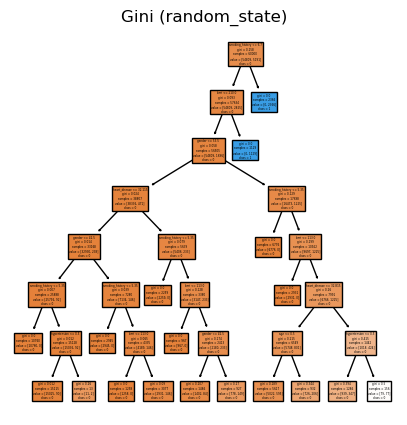

In [20]:
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=7, random_state=15, criterion='gini')
model.fit(X_train, y_train)

# Visualize the Decision Tree using matplotlib

plt.figure(figsize=(5, 5))
plot_tree(model, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Gini (random_state)")
plt.show()


In [21]:
y_predict = model.predict(X_test)

In [22]:
matches = np.sum(y_test == y_predict)
accuracy = matches / len(y_test)
accuracy * 100

97.39999999999999

**<span style="color:darkblue; font-size:20px;">2/ Neural network for binary classification using TensorFlow and Keras :</span>**


In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [24]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [25]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=10,
                    validation_data=(X_val, y_val))

Epoch 1/20
6000/6000 [==============================] - 27s 4ms/step - loss: 0.3239 - accuracy: 0.9076 - val_loss: 0.2498 - val_accuracy: 0.9116
Epoch 2/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.2101 - accuracy: 0.9287 - val_loss: 0.2485 - val_accuracy: 0.9280
Epoch 3/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1856 - accuracy: 0.9360 - val_loss: 0.1505 - val_accuracy: 0.9495
Epoch 4/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1689 - accuracy: 0.9423 - val_loss: 0.1534 - val_accuracy: 0.9485
Epoch 5/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1578 - accuracy: 0.9461 - val_loss: 0.1593 - val_accuracy: 0.9470
Epoch 6/20
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1519 - accuracy: 0.9487 - val_loss: 0.1316 - val_accuracy: 0.9522
Epoch 7/20
6000/6000 [==============================] - 24s 4ms/step - loss: 0.1483 - accuracy: 0.9502 - val_loss: 0.1198 - val_ac

In [27]:
predictions = model.predict(X_test)

625/625 [==============================] - 4s 3ms/step


In [28]:
#predicted_labels = np.where(predictions >= 0.5, 1, 0).flatten()

#manually calculating test accuracy
predicted_labels = np.where(predictions >= 0.5, 1, 0).reshape(-1)
comparison_array = predicted_labels == y_test.astype(int)
accuracy = np.mean(comparison_array)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 93.405%


**<span style="color:darkblue; font-size:20px;">3/ XGBoost classifier</span>**


In [29]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=100, learning_rate=0.1, verbosity=1,
                          random_state=15, eval_metric='logloss')
XGB_model.set_params(early_stopping_rounds=9)
XGB_model.fit(X_train.to_numpy(), y_train.to_numpy(), eval_set=[(X_val.to_numpy(), y_val.to_numpy())])

[0]	validation_0-logloss:0.60761
[1]	validation_0-logloss:0.53757
[2]	validation_0-logloss:0.47930
[3]	validation_0-logloss:0.43019
[4]	validation_0-logloss:0.38835
[5]	validation_0-logloss:0.35250
[6]	validation_0-logloss:0.32153
[7]	validation_0-logloss:0.29464
[8]	validation_0-logloss:0.27120
[9]	validation_0-logloss:0.25073
[10]	validation_0-logloss:0.23272
[11]	validation_0-logloss:0.21683
[12]	validation_0-logloss:0.20283
[13]	validation_0-logloss:0.19046
[14]	validation_0-logloss:0.17954
[15]	validation_0-logloss:0.16981
[16]	validation_0-logloss:0.16118
[17]	validation_0-logloss:0.15348
[18]	validation_0-logloss:0.14668
[19]	validation_0-logloss:0.14058
[20]	validation_0-logloss:0.13515
[21]	validation_0-logloss:0.13030
[22]	validation_0-logloss:0.12598
[23]	validation_0-logloss:0.12212
[24]	validation_0-logloss:0.11864
[25]	validation_0-logloss:0.11555
[26]	validation_0-logloss:0.11275
[27]	validation_0-logloss:0.11023
[28]	validation_0-logloss:0.10799
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=9,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=15, ...)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print("XGB scores:\n")
print("Best Iteration: ",XGB_model.best_iteration)
print(f"Train Accuracy: {accuracy_score(XGB_model.predict(X_train),y_train) * 100}%")
print(f"Validation Accuracy: {accuracy_score(XGB_model.predict(X_val),y_val) * 100}%")

XGB scores:

Best Iteration:  97
Train Accuracy: 97.24166666666667%
Validation Accuracy: 97.1%


**<span style="color:darkblue; font-size:20px;">4/ Random Forest classifier with specified hyperparameters:</span>**


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
random_forest_model = RandomForestClassifier(min_samples_split = 100,max_depth = 7,
                                             random_state = 15,n_jobs = 5, n_estimators = 50).fit(X_train,y_train)

In [34]:
print("Accuracy Scores (RandomForestClassifier):\n")
print(f"Train: {accuracy_score(random_forest_model.predict(X_train),y_train)*100}%")
print(f"Cross-validation: {accuracy_score(random_forest_model.predict(X_val),y_val)*100}%")


Accuracy Scores (RandomForestClassifier):

Train: 97.17333333333333%
Cross-validation: 97.015%


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 500


# descriptive statistics
print(df_imputed.describe())

# correlation matrix
corr_matrix = df_imputed.corr()
print(corr_matrix)

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  gender_Female  \
count  100000.000000        100000.000000  100000.000000  100000.000000   
mean        5.527507           138.058060       0.085000       0.585520   
std         1.070672            40.708136       0.278883       0.492635   
min         3.500000            80.000000       0.000000       0.000000   
25%         

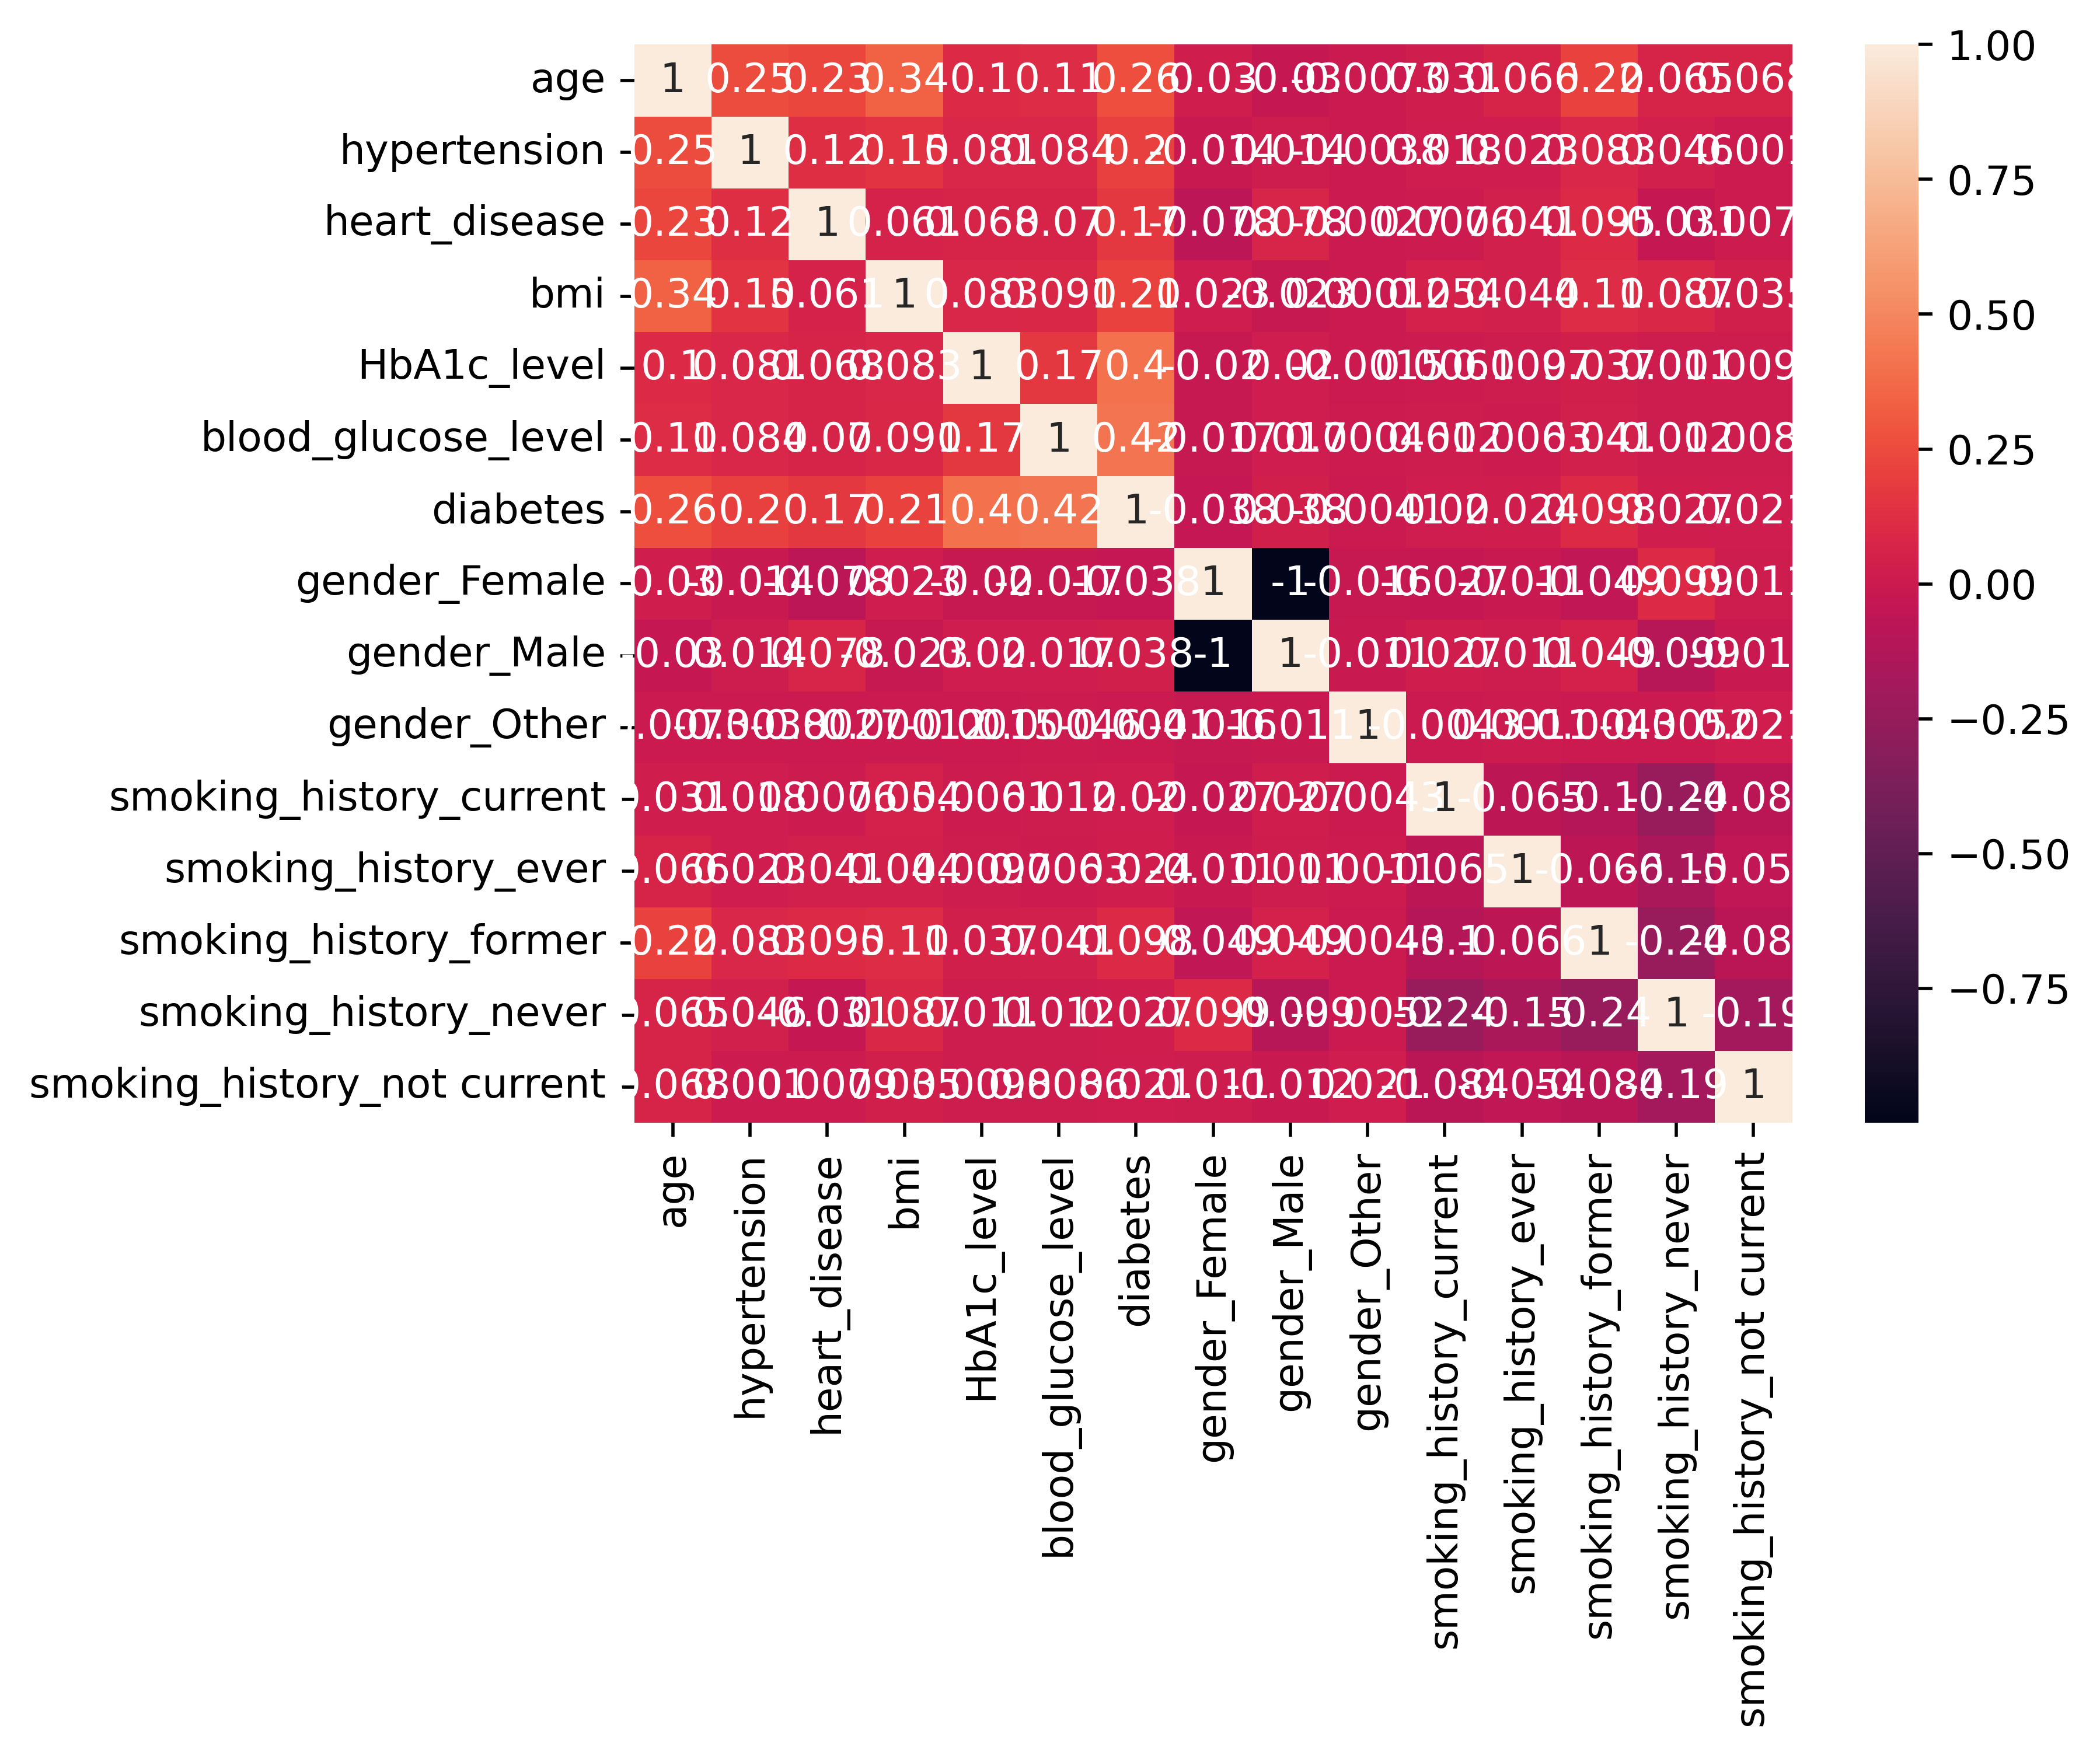

In [36]:
# heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


**<span style="color:darkblue; font-size:20px;">5/ Logistic Regression model</span>**


In [37]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000,solver='newton-cg') 
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [38]:
y_pred = lr_model.predict(X_test)
matches = np.sum(y_test == y_pred)
accuracy = matches / len(y_test)
accuracy * 100

96.275